## Homework 6, Problem 1 on reaching data and neural data

ECE C143A/C243A, Spring Quarter 2022, Prof. J.C. Kao, TAs T. Monsoor and W. Yu

Total: 20 points

Download the dataset `JR_2015-12-04_truncated2.mat` from BruinLearn.

This data structure contains simultaneous reaching (kinematic) data and neural data.
A large part of this question will be getting acquainted with this data.

Loading the downloaded file will drop a variable called `R`, in your Python workspace.
We will call this variable the R-dict (or sometimes R-struct).

It is an array of dictionaries, with each dictionary in the array corresponding to one trial performed by Monkey J. In this data, Monkey J is performing a reaching task in which he acquires a center target, and then a peripheral target. After acquiring the peripheral target, he comes back to acquire the center target, and then acquires another peripheral target. This task is called a "center-out-and-back" task as the monkey continuously reaches from the center to a peripheral target, and then back to the center.

This assignment incorporates the `scipy` package.  If you do not have it installed, you can install it by running:

`pip install scipy`

You may also install a package compiler for scientific computing, like `anaconda`: https://www.anaconda.com/download/

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special
import scipy.io as sio
import math
import nsp as nsp
# Load matplotlib images inline
%matplotlib inline
# Reloading any code written in external .py files.
%load_ext autoreload
%autoreload 2
data = sio.loadmat('JR_2015-12-04_truncated2.mat') # load the .mat file.
R = data['R'][0,:]

### (a) (1 point) How many trials?

How many trials were performed by Monkey J in this R-struct?

In [3]:
#====================================================#
# YOUR CODE HERE:
#   Calculate the number of trials in the R-dict
#====================================================#
print(len(R))
#====================================================#
# END YOUR CODE
#====================================================#

506


Answer: $\color{blue}{\text{506 trials.}}$ 

### (b) (2 point) Where are the targets?

`R[i]['target']` is the target that Monkey J reached to on trial `i`.  How many unique targets are there?  Please provide a 2D plot of all the target locations.  Ignore the 3rd dimension ($z$-location) which is by default set at $-70$ (i.e., it was not used). The units of `R[0,i]['target']` are in millimeters.


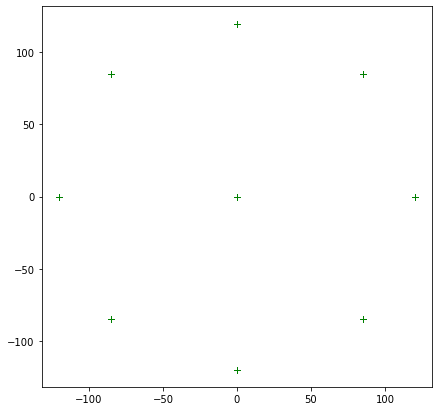

In [4]:
plt.figure(figsize=(7,7))
#====================================================#
# YOUR CODE HERE:
#   Generate 2D plot of all the target locations 
#====================================================#
X = []; Y = [];
for i in range(len(R)):
    X.append(R[i]['target'][0])
    Y.append(R[i]['target'][1])
plt.plot(X,Y,'g+')
#====================================================#
# END YOUR CODE
#====================================================#
plt.show()

Question: How many unique targets(including the center target) are there?

Answer: $\color{blue}{\text{9 unique targets including the center.}}$ 

### (c) (1 point) How many failures?

`R[i]['isSuccessful']` indicates if Monkey J successfully acquired the target on trial $i$.  This means that he reaches to the target and holds his position within a $4$cm by $4$cm box centered around the target for $500$ms.  How many failures are there in this R-struct? 

Hint: `isSuccessful` attribute has the dtype of uint8. Be careful about data types; in general it's always good practice to perform operations on same data types.  If the number of trials is encoded as an `int`, you should cast the `isSuccessful` variable to be an int. You may achieve this by calling `isSuccessful = np.asarray(R['isSuccessful'], dtype=int)`.

In [5]:
#====================================================#
# YOUR CODE HERE:
#   Calculate the number of failures in the R-dict
#====================================================#
isSuccessful = np.asarray(R['isSuccessful'], dtype=int)
print('number of failures:') 
print(len(np.where(isSuccessful==0)[0]))
print('number of success:')
print(len(np.where(isSuccessful==1)[0]))
#====================================================#
# END YOUR CODE
#====================================================#

number of failures:
0
number of success:
506


Question: How many failures are there in this R-struct?

Answer: $\color{blue}{\text{0 failures.}}$ 

### (d) (2 points) Kinematic sampling. [Code is provided; but you still need to analyze the output and answer the question]

`R[i]['cursorPos']` is a $3 \times T_i$ matrix that contains the monkey's hand position over time on trial $i$, where $T_i$ is the length of trial $i$ in milliseconds. 

* The 1st row is the $x$ position and the 2nd row is the $y$ position of Monkey J.
* The units are in millimeters.
* Ignore the 3rd row -- which is $z$ position (set to $-70$ mm by default in this data).
* Each column represents $1$ ms.  That is, if $T_i = 1032$, this indicates that the trial lasted for $1032$ milliseconds. Note that `R[i]['cursorPos'][:,-1]` and `R[i+1]['cursorPos'][:,0]` are also separated by $1$ ms, so that the R-struct contains millisecond resolution data and no segments of time are unobserved.
* The kinematics in `R[0,i]['cursorPos']` are sampled from a system called 'Polaris' that tracks a bead taped on the monkey's finger.
		
Observe the values of `R[i]['cursorPos']`.
Does the ''Polaris'' system sample the monkey's kinematics at $1$ ms resolution (i.e., $1000$ Hz)?
If not, approximately at what frequency does Polaris sample the kinematics?        

In [6]:
#set printoption so that you can view the whole array by call print 
import sys
np.set_printoptions(threshold=sys.maxsize)
#====================================================#
# YOUR CODE HERE:
#   Analysis the frequency of sampling
#====================================================#
i=1
print(R[i]['cursorPos'][:,0:200]) 
# we just print 0:200 because there are too many elements, 200 is enough to estimate the frequency

samples = R[i]['cursorPos'][:,0:200][0]
counter = 1; sample = 0; counts = []
for i in range(np.size(samples)):
    if samples[i]==sample:
        counter += 1
    else:
        counts.append(counter)
        counter = 1
    sample = samples[i]

print('How many times the same position was repeatedly recorded by "Polaris" system.')
print(counts[2:-1])

print('Average')
average = (counts.count(16)*16+counts.count(17)*17)/(counts.count(16)+counts.count(17))
print(str(average)+' ms')

print('Frequency')
print(str(1/(average*0.001))+' Hz')
#====================================================#
# END YOUR CODE
#====================================================#

[[  1.73   1.73   1.73   1.73   1.73   1.73   1.73   1.73   1.73   1.73
    1.96   1.96   1.96   1.96   1.96   1.96   1.96   1.96   1.96   1.96
    1.96   1.96   1.96   1.96   1.96   1.96   2.23   2.23   2.23   2.23
    2.23   2.23   2.23   2.23   2.23   2.23   2.23   2.23   2.23   2.23
    2.23   2.23   2.23   2.47   2.47   2.47   2.47   2.47   2.47   2.47
    2.47   2.47   2.47   2.47   2.47   2.47   2.47   2.47   2.47   2.47
    2.66   2.66   2.66   2.66   2.66   2.66   2.66   2.66   2.66   2.66
    2.66   2.66   2.66   2.66   2.66   2.66   2.83   2.83   2.83   2.83
    2.83   2.83   2.83   2.83   2.83   2.83   2.83   2.83   2.83   2.83
    2.83   2.83   2.83   2.93   2.93   2.93   2.93   2.93   2.93   2.93
    2.93   2.93   2.93   2.93   2.93   2.93   2.93   2.93   2.93   2.93
    2.99   2.99   2.99   2.99   2.99   2.99   2.99   2.99   2.99   2.99
    2.99   2.99   2.99   2.99   2.99   2.99   3.05   3.05   3.05   3.05
    3.05   3.05   3.05   3.05   3.05   3.05   3.05   3.05   3.05

Question: Does the 'Polaris' system sample the monkey's kinematics at  1  ms resolution (i.e., 1000Hz)? If not, approximately at what frequency does Polaris sample the kinematics?

Answer: $\color{blue}{\text{The position recorded by "Polaris" system is updated in approximately 16.6 ms, and the corresponding frequency is about 60.0 Hz. }}$ $\color{blue}{\text{ The result is consistent with the information given by "Technical assessment of the NDI Polaris Vega optical tracking system"}}$ https://ro-journal.biomedcentral.com/articles/10.1186/s13014-021-01804-7. 

### (e) (1 points) Reach trajectories.

Present a 2D plot showing Monkey J's hand position across the entire R-dict. Does it look like the plot of a center-out-and-back task?

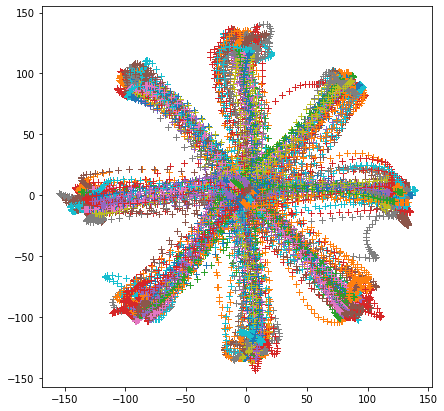

In [7]:
#====================================================#
# YOUR CODE HERE:
#   Generate 2D plot of hand position
#====================================================#
plt.figure(figsize=(7,7))
for i in range(len(R)):
    plt.plot(R[i]['cursorPos'][0],R[i]['cursorPos'][1],'+')
#====================================================#
# END YOUR CODE
#====================================================#

Question: Does it look like the plot of a center-out-and-back task?

Answer: $\color{blue}{\text{Yes. }}$


### (f) (1 points) Number of electrodes.

The R-struct contains neural data recorded from electrode arrays implanted in Monkey J's motor cortex.

We'll only consider `R[i]['spikeRaster']`, which is an $N \times T_i$ matrix of activity from primary motor cortex (M1).

(There is an `R[i]['spikeRaster2']`, which we will ignore. It contains activity from PMd.)

There are $N$ electrodes, and each electrode is measuring spiking activity. Each row of `R[i]['spikeRaster']` corresponds to the spiking activity, at millisecond resolution, for Monkey J. If the value of row $n$ and column $t$ is 1, then it indicates that a neuron spiked on electrode $n$ at time $t$. If the value of this entry is 0, it indicates that no spike occurred on electrode $n$ at time $t$.

Note that we store `R[i]['spikeRaster']` as a sparse matrix, since a neuron is often not spiking (corresponding to $0$'s).

It is more memory efficient to store the locations of the non-zero values in the matrix than to store the entire matrix.

In Python, one may use the command `.todense()` to make this a standard matrix.

How many electrode channels are there?         

In [8]:
#====================================================#
# YOUR CODE HERE:
#   Calculate the number of electrode channels
#====================================================#
print(R[i]['spikeRaster'].shape[0])
#====================================================#
# END YOUR CODE
#====================================================#

96


Question: How many electrode channels are there?     

Answer: $\color{blue}{\text{96 electrode channels. }}$

### (g) (4 points) Spike raster. [Code solution provided; please understand it]

Plot a spike raster of all reaches to the right target, located at (120 mm,0 mm), for electrode 17.          
(Hint: use the `nsp.PlotSpikeRaster` function in `nsp.py`.)     

Text(0.5, 1.0, 'Spike Raster')

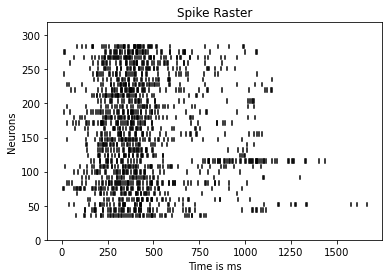

In [8]:
#====================================================#
# YOUR CODE HERE:
#  Generate spike raster of all reaches to the right target
#====================================================#
spike_train = np.empty((0,0),dtype = list)
f = 0
trial_num = len(R)
for i in range(trial_num):
    target = R[i]['target'][0:2]    
    if target[0]==120 and target[1]== 0 :
        spike_train = np.append(spike_train,0)
        spike_train[f] =  R[i]['spikeRaster'][16,:].todense().nonzero()[1]
        f = f + 1
nsp.PlotSpikeRaster(spike_train)
plt.xlabel('Time is ms')
plt.ylabel('Neurons')
plt.title('Spike Raster')
#====================================================#
# END YOUR CODE
#====================================================#

### (h) (4 points) ISI distribution.

Plot the ISI distribution for electrode 17 across all trials in the R-dict (i.e., one ISI histogram with data from all reaches).  
Make the ISI histogram bins $10$ ms wide. Did we spike sort this neural data?

(array([3.54321334e-02, 2.26222160e-02, 1.38324695e-02, 7.73217537e-03,
        4.86062474e-03, 3.29177756e-03, 2.31124807e-03, 1.77896064e-03,
        1.15562404e-03, 1.07157865e-03, 8.05434935e-04, 6.93374422e-04,
        6.02325256e-04, 5.25283653e-04, 4.41238269e-04, 3.64196666e-04,
        2.87155064e-04, 2.24121025e-04, 2.94158846e-04, 2.24121025e-04,
        1.68090769e-04, 1.61086987e-04, 1.26068077e-04, 9.10491665e-05,
        8.40453845e-05, 1.12060513e-04, 9.80529486e-05, 4.90264743e-05,
        7.70416025e-05, 5.60302563e-05, 7.00378204e-05, 3.50189102e-05,
        3.50189102e-05, 2.80151282e-05, 7.00378204e-06, 4.20226923e-05,
        3.50189102e-05, 2.10113461e-05, 4.20226923e-05, 2.10113461e-05,
        2.80151282e-05, 1.40075641e-05, 1.40075641e-05, 7.00378204e-06,
        0.00000000e+00, 7.00378204e-06, 7.00378204e-06, 7.00378204e-06,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 7.00378204e-06, 0.00000000e+00]),
 array

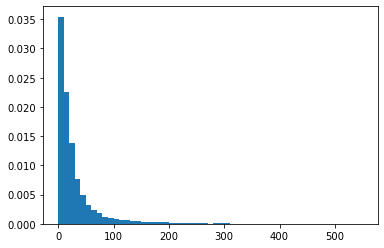

In [10]:
#====================================================#
# YOUR CODE HERE:
#   Generate the ISI distribution for electrode 17
#====================================================#
T = []
for i in range(len(R)):
    T.append(np.ediff1d(R[i]['spikeRaster'][16,:].todense().nonzero()[1]))
Ts = np.concatenate(T[:],axis=0)
plt.hist(Ts, bins=np.arange(0,np.max(Ts),10), density=True)
#====================================================#
# END YOUR CODE
#====================================================#

Question: Did we spike sort this neural data?

Answer: 

 $\color{blue}{\text{According to }}$ http://www.scholarpedia.org/article/Spike_sorting#:~:text=Spike%20sorting%20is%20the%20grouping,activity%20of%20different%20putative%20neurons,  $\color{blue}{\text{"spike sorting is the grouping of spikes into clusters based on the similarity of their shapes... }}$  $\color{blue}{\text{the resulting clusters correspond to the activity of different putative neurons." }}$

 $\color{blue}{\text{If this neural data is spike sorted, the above histogram is expected be similar to gamma distribution due to absolute refractory period.}}$  $\color{blue}{\text{However, the above histogram is similar to exponential distribution. This indicates that the neural data is NOT spike sorted, }}$  $\color{blue}{\text{meaning one electrode records spikes from multiple neurons, and the absolute refractory period of each neuron is not reflected to the histogram. }}$


### (i) (4 points) PSTH.

Plot the average firing rate for each of 8 unique peripheral reach directions for electrode 17.

To do so, we have provided a binning function, `nsp.bin` which takes a spike raster matrix and counts the spikes in non-overlapping windows of some length $\Delta t$ (to be specified as an input) for each neuron.

Do the following: 
* Call `nsp.bin` in the correct way to bin the spikes in non-overlapping $25$ ms bins.
* Then, for each of the $8$ unique center-out reach conditions, average the binned spike counts for electrode 17, from $t=0$ to $500$ ms.
* For each of these traces, smooth them by using smooth function in `nsp.smooth` with `window_len = 5`, i.e., if one of these 8 traces was stored as the variable `trace`, you would call `trace = nsp.smooth(trace, window_len = 5)`.
* You should now have 8 traces of averaged binned spike counts for electrode 17.
* Plot these average, smoothed, firing rates through time on the same plot (x-axis time in ms, y-axis firing rate; be sure to get the unit scale correct. Use a different color for each of the 8 reach conditions. Note, these trial-averaged plots of the firing rate are often called peri-stimulus time histograms, or PSTHs. We do this to visualize the data and be sure it makes sense.

Text(0, 0.5, 'firing rate [spikes/s]')

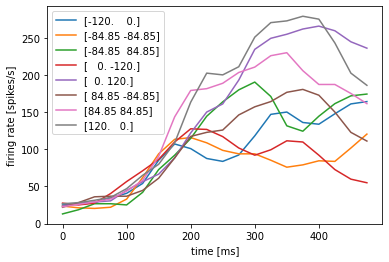

In [10]:
#====================================================#
# YOUR CODE HERE:
#   Perform the above described tasks to generate a PSTH.
#====================================================#
tend = 500; tbin = 25; 
targets = np.unique(np.concatenate((X,Y),axis=1),axis=0).reshape(9,2,1)
traces = [[0]*20 for _ in range(targets.shape[0])]; counter=[[0] for _ in range(targets.shape[0])]

for i in range(len(R)):
    index = np.argwhere(np.sum(np.abs(targets-R[i]['target'][0:2]),axis=1)==0)[0][0]
    traces[index] = np.add(traces[index],nsp.bin(R[i]['spikeRaster'][16,0:tend],tbin,'sum'))
    counter[index] = np.add(counter[index],1)
    
for i,trace in enumerate(traces):
    if i == 4:continue # skip center
    trace = [number / counter[i] for number in trace]
    plt.plot(np.arange(0,500, 500/20),100*nsp.smooth(trace[0], window_len = 5),label=targets[i].reshape(1,2)[0])
plt.legend(); plt.xlabel('time [ms]'); plt.ylabel('firing rate [spikes/s]')
#====================================================#
# END YOUR CODE
#====================================================#

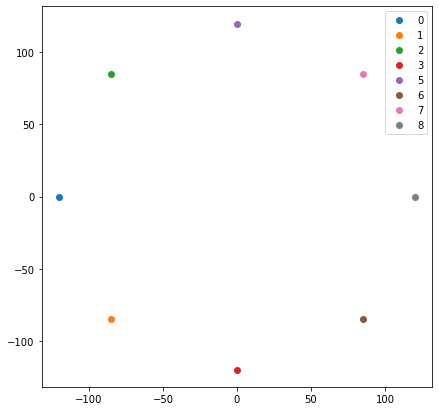

In [16]:
plt.figure(figsize=(7,7))
for i in range(len(traces)):
    if i == 4:continue
    plt.plot(targets[i][0],targets[i][1],'o',label=i)
plt.legend()
plt.show()